# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
#Import Necessary Librariesimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn



# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [6]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
df = pd.read_csv('healthcare_dataset.csv')
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [42]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define the target variable (replace 'target_column' with your actual column name)
target_column = 'Medical Condition'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target labels

# Split into training (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split temp (20%) into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Ensure X_train, X_val, X_test are NumPy arrays for compatibility
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_val = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Print dataset sizes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (44400, 14), (44400,)
Validation set: (5550, 14), (5550,)
Test set: (5550, 14), (5550,)


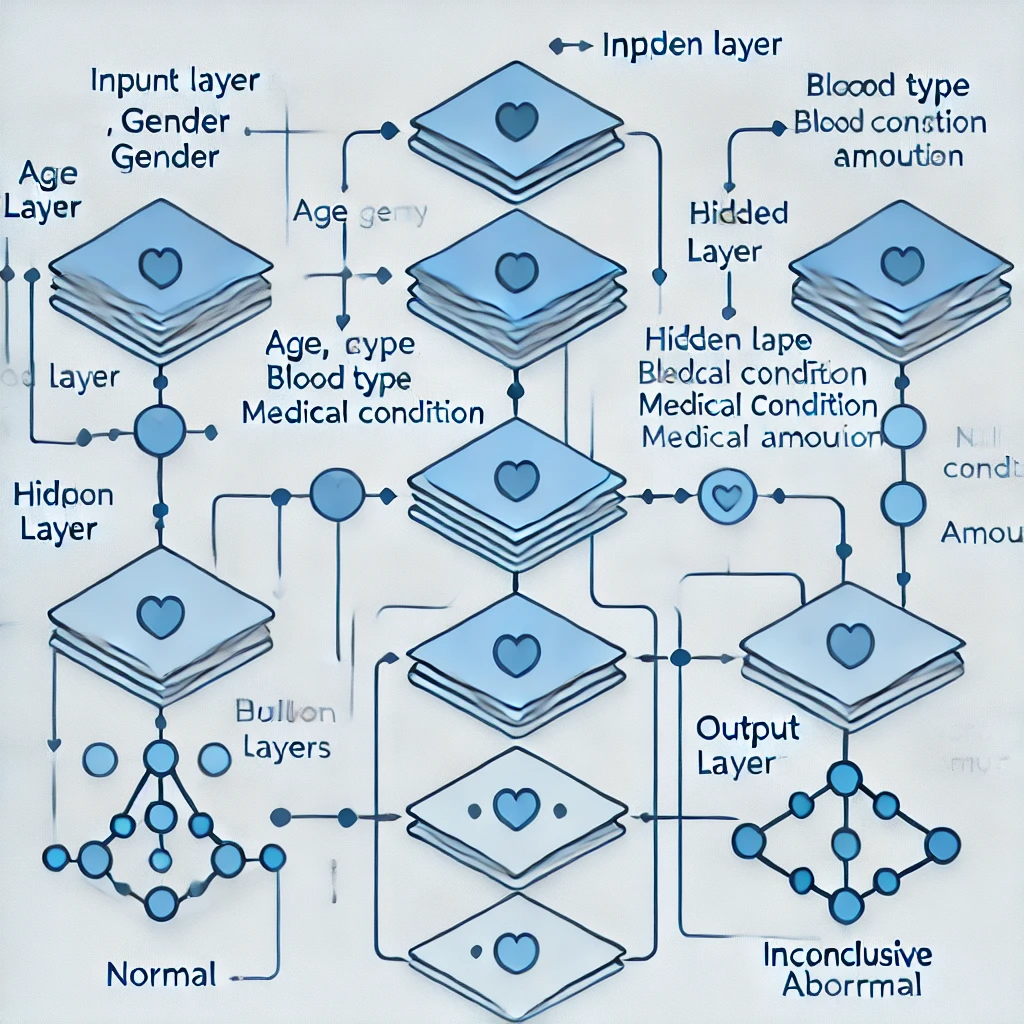

In [10]:
from IPython.display import display, Image

image_path = "Healthcare_structure.png"  # Update with your image file path
display(Image(image_path))

#Task: Define a function that creates models without and With specified Optimization techniques


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

def define_model(optimization: str, regularization: str, early_stopping: bool, dropout: float, learning_rate: float, input_shape, num_classes):
    model = Sequential()

    # Input Layer
    model.add(Dense(64, activation='relu', input_shape=input_shape))

    # Regularization
    reg = None
    if regularization == 'l1':
        reg = l1(0.01)
    elif regularization == 'l2':
        reg = l2(0.01)

    # Hidden Layers with Regularization and Dropout
    model.add(Dense(64, activation='relu', kernel_regularizer=reg))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))

    # Output Layer
    if num_classes == 2:
        model.add(Dense(1, activation='sigmoid'))  # Binary classification
        loss_fn = 'binary_crossentropy'
    else:
        model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification
        loss_fn = 'sparse_categorical_crossentropy'

    # Optimizer
    if optimization == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimization == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = 'sgd'

    # Compile Model
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

    # Early Stopping Callback
    callbacks = [EarlyStopping(monitor='val_loss', patience=3)] if early_stopping else []

    return model, callbacks

    # Train model
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        batch_size=32,
                        callbacks=callbacks,
                        verbose=1)
    return model, history



# Task: Print out the Final Model Accuracy and plot the Loss curve

In [49]:
import matplotlib.pyplot as plt

def loss_curve_plot(history):
    """
    Plots the training and validation loss curve.

    Parameters:
    - history: Keras model training history object
    """
    epochs = range(1, len(history.history['loss']) + 1)  # Get number of epochs
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' for blue dots & line
    plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' for red triangles & line
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [45]:
# Model 1: Without any optimization techniques
model_sgd, history_sgd = define_model(
    optimization='sgd',
    regularization='l2',  # or 'l1' or 'none'
    early_stopping=True,
    dropout=0.5,
    learning_rate=0.001,
    input_shape=(X_train.shape[1],),
    num_classes=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model_adam, history_adam = define_model(
    optimization='adam',
    regularization='l2',  # or 'l1' or 'none' for no regularization
    early_stopping=True,
    dropout=0.5,
    learning_rate=0.001,
    input_shape=(X_train.shape[1],),  # Make sure to adjust the input shape
    num_classes=2  # Or adjust based on your number of classes
)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for the Adam model
y_pred_adam = model_adam.predict(X_test)
y_pred_adam = (y_pred_adam > 0.5).astype(int)  # For binary classification

# Confusion Matrix for Adam Model
cm_adam = confusion_matrix(y_test, y_pred_adam)
print("Confusion Matrix for Adam Model:")
print(cm_adam)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_adam, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Adam Optimizer')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Error Analysis Metrics for Adam Model
print("\nClassification Report for Adam Model:")
print(classification_report(y_test, y_pred_adam))


ValueError: Invalid dtype: object

In [40]:
model_rmsprop, history_rmsprop = define_model(
    optimization='rmsprop',
    regularization='l2',  # or 'l1' or 'none'
    early_stopping=True,
    dropout=0.5,
    learning_rate=0.001,
    input_shape=(X_train.shape[1],),
    num_classes=2
)

In [51]:
# Predictions for the RMSprop model
y_pred_rmsprop = model_rmsprop.predict(X_test)
y_pred_rmsprop = (y_pred_rmsprop > 0.5).astype(int)  # For binary classification

# Confusion Matrix for RMSprop Model
cm_rmsprop = confusion_matrix(y_test, y_pred_rmsprop)
print("Confusion Matrix for RMSprop Model:")
print(cm_rmsprop)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rmsprop, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - RMSprop Optimizer')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


ValueError: Invalid dtype: object

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [50]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
